In [179]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("./capturequic_c_pcap.csv", sep='@')
cond_s = df['ip.src'] == '192.168.1.78'
df_s = df[cond_s]
cond_c = df['ip.src'] == '192.168.1.79'
df_c  = df[cond_c]
# frame_type == 3：ACK for STREAM
cond_ack = df_s['quic.frame_type'].str.contains('3', na=False)
df_s_ack = df_s[cond_ack]
df_s_ack[:5]

,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.Protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,_ws.col.Info,quic.ack.largest_acknowledged,quic.ack.ack_delay
12,13,1,"Nov 9, 2023 14:57:22.835729000 CST",1.699513e+09,298,"3,7,6,30",QUIC,17,284,192.168.1.78,192.168.1.79,264,4242,53831,53e105534023ede8834503d04a3fe97ddcb1f35fe894a7...,"Protected Payload (KP0), PKN: 1, ACK_ECN, NT, ...",2.0,47.0
16,17,3,"Nov 9, 2023 14:57:23.635892000 CST",1.699513e+09,70,3,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,53831,56a9cbcb0deea82494e373141d6844bdd81a8e050324fc...,"Protected Payload (KP0), PKN: 3, ACK_ECN",4.0,3247.0
22,23,6,"Nov 9, 2023 14:57:23.875355000 CST",1.699513e+09,70,3,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,53831,5c5a07fca49c53affac304be137c8d9bade017dc2e194d...,"Protected Payload (KP0), PKN: 6, ACK_ECN",7.0,3219.0
26,27,8,"Nov 9, 2023 14:57:24.387656000 CST",1.699513e+09,70,3,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,53831,58819c8878a78fe93b1b2016a0e142306d14d460ec2b94...,"Protected Payload (KP0), PKN: 8, ACK_ECN",9.0,3226.0
29,30,9,"Nov 9, 2023 14:57:24.899397000 CST",1.699513e+09,70,3,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,53831,41c64e27d661b93ab6950548e09f89f709efc88f6572f0...,"Protected Payload (KP0), PKN: 9, ACK_ECN",11.0,3168.0


In [164]:
# Create an empty list to hold the results
rows = []

delete_row = []

for i in df_s_ack.index:
    n = df.iloc[i]['quic.ack.largest_acknowledged']
    idx = int(n)
    filtered_data = df_c[df_c['quic.packet_number'] == str(idx)]
    filtered_data = filtered_data[filtered_data['quic.frame_type'].str.contains('12', na=False)]
    if filtered_data[filtered_data['quic.frame_type'].str.contains('12', na=False)].empty == True:
        df_s_ack = df_s_ack.drop(i)
        print(i, "HI")
        continue
    rows.append(filtered_data)
    # else:
    #     df_s_ack = df_s_ack.drop(n)
    #     continue

# Now concatenate the rows to create the resulting DataFrame
df_c_stream = pd.concat(rows) # Transpose the DataFrame if needed

df_c_stream[:10]
# df_s_ack[:5]

,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.Protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,_ws.col.Info,quic.ack.largest_acknowledged,quic.ack.ack_delay
14,15,4,"Nov 9, 2023 14:57:23.332744000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,5de0f0374e065cb06fe7d399c5b44039b621f56b1b4f33...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 4...",NaN,NaN
20,21,7,"Nov 9, 2023 14:57:23.833061000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,47e0f0374ef46d84832baa67a573c4ec5e07130e7df3fe...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 7...",NaN,NaN
24,25,9,"Nov 9, 2023 14:57:24.333429000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,5fe0f0374e741f33c8bcf8d321d45f5d45b03c852fc175...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 9...",NaN,NaN
28,29,11,"Nov 9, 2023 14:57:24.833726000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,4ce0f0374e5b0a864f53bdf9060ab15e1561fc22f2ea9d...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN
30,31,12,"Nov 9, 2023 14:57:25.334189000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,47e0f0374e6962d99a8a6f00fda449879766c9bfe0df62...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN
32,33,13,"Nov 9, 2023 14:57:25.834663000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,43e0f0374e6bb35dfd20179f6aa658f23afed52abd43a3...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN
34,35,14,"Nov 9, 2023 14:57:26.335103000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,46e0f0374ebfa7361220f7435d2b1319d0c35e1a2cbeab...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN
36,37,15,"Nov 9, 2023 14:57:26.835657000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,44e0f0374e6be567b4aebf99566d483852baf5c8cadd97...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN
38,39,16,"Nov 9, 2023 14:57:27.336222000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,5de0f0374e6bcc1ae571e1101396f7a72fbc424d6d7308...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN
40,41,17,"Nov 9, 2023 14:57:27.836933000 CST",1.699513e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,53831,4242,47e0f0374e77a407b553ac21d816abcc6427680473b1ec...,"Protected Payload (KP0), DCID=e0f0374e, PKN: 1...",NaN,NaN


In [165]:
print(df_s_ack.index)
print(len(df_s_ack))

Index([ 16,  22,  26,  29,  31,  33,  35,  37,  39,  41,
       ...
       253, 255, 259, 261, 263, 265, 267, 269, 271, 273],
      dtype='int64', length=120)
120


In [12]:
x = df['udp.payload'].iloc[0]
t = int(x[16:24], 16)
usec = int(x[24:32], 16)
seq = int(x[32:40], 16)
print(t, usec, seq)

1275600109 2073224735 1728183552


In [101]:
df['quic.frame_type'].iloc[12]

'3,7,6,30'

In [166]:
if len(df_s_ack) != len(df_c_stream):
    print("length not match", len(df_s_ack), len(df_c_stream))
for i in range(len(df_s_ack)):
    if int(df_c_stream['quic.packet_number'].iloc[i]) != int(df_s_ack['quic.ack.largest_acknowledged'].iloc[i]):
        print("packet not match!", df_c_stream['quic.packet_number'].iloc[i], int(df_s_ack['quic.ack.largest_acknowledged'].iloc[i]))
print("check done!")

check done!


## Calculate Round-Trip-Time
1. send time - receive time
2. Show it as an IQR

In [172]:
rtt_list = []
for i in range(len(df_s_ack)):
    rtt_list.append(df_s_ack['frame.time_epoch'].iloc[i] - df_c_stream['frame.time_epoch'].iloc[i])

In [180]:
stdev = statistics.stdev(rtt_list)
mean = statistics.mean(rtt_list)
median = statistics.median(rtt_list)
print("standard deviation:", stdev)
print("mean:", mean)
print("median:", median)

standard deviation: 0.04259705274800667
mean: 0.08517603476842245
median: 0.08097553253173828


In [173]:
q1, q3 = np.percentile(rtt_list, [25, 75])
iqr = q3 - q1

lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, higher_fence)

0.05420219898223877 0.11251652240753174 0.05831432342529297 -0.033269286155700684 0.1999880075454712


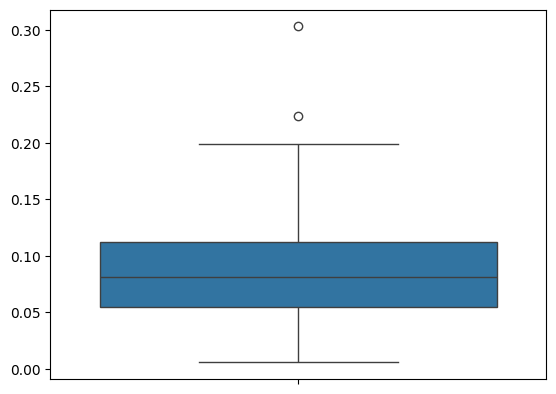

In [178]:
sns.boxplot(rtt_list)
plt.show()